## Simulate time series using fitted ARIMA model:

### Using sktime and statsforecast

In [17]:
#-----------------IMPORTS-----------------#
from numba import njit
import pandas as pd #we separately import pandas to read data from a csv file
import numpy as np

#-----------------DATA-----------------#
#1min EURGBP data
url = "https://onedrive.live.com/download?resid=4E16D53638D067A9%21339325&authkey=!AHOCBUokDjDiCc8"

#1 second EURGBP data
#url = "https://onedrive.live.com/download?resid=4E16D53638D067A9%21339754&authkey=!ACcJZZPFqOmKVUY"

data_downloaded = pd.read_csv(url, parse_dates = True, index_col=0) #it's a time series data, so I'm setting the index to be the first column
data_downloaded = data_downloaded.asfreq('T')
data_downloaded.ffill(inplace=True)
print(data_downloaded.index.freq)
#close = data_downloaded["close"].to_numpy() #We transform the close prices into a numpy array

<Minute>


In [18]:
### Fit using sktime
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(stepwise=False, n_jobs=-1, start_p=0, start_q=0, max_p=10, max_q=10, seasonal=False)
forecaster.fit(data_downloaded["close"])
forecaster.get_fitted_params()

{'intercept': -5.398901140173307e-08,
 'ma.L1': -0.1042188993634203,
 'ma.L2': -0.029764115450367442,
 'ma.L3': -0.002917953581047072,
 'ma.L4': 0.004290940137585559,
 'ma.L5': -0.012028812812397361,
 'sigma2': 2.956406656496939e-09,
 'order': (0, 1, 5),
 'seasonal_order': (0, 0, 0, 0),
 'aic': -5639035.469712176,
 'aicc': -5639035.469378472,
 'bic': -5638960.403255404,
 'hqic': -5639013.861095114}

In [19]:
### Fitted ARIMA parameters:
{'intercept': -5.398901140173307e-08,
 'ma.L1': -0.1042188993634203,
 'ma.L2': -0.029764115450367442,
 'ma.L3': -0.002917953581047072,
 'ma.L4': 0.004290940137585559,
 'ma.L5': -0.012028812812397361,
 'sigma2': 2.956406656496939e-09,
 'order': (0, 1, 5),
 'seasonal_order': (0, 0, 0, 0),
 'aic': -5639035.469712176,
 'aicc': -5639035.469378472,
 'bic': -5638960.403255404,
 'hqic': -5639013.861095114}

{'intercept': -5.398901140173307e-08,
 'ma.L1': -0.1042188993634203,
 'ma.L2': -0.029764115450367442,
 'ma.L3': -0.002917953581047072,
 'ma.L4': 0.004290940137585559,
 'ma.L5': -0.012028812812397361,
 'sigma2': 2.956406656496939e-09,
 'order': (0, 1, 5),
 'seasonal_order': (0, 0, 0, 0),
 'aic': -5639035.469712176,
 'aicc': -5639035.469378472,
 'bic': -5638960.403255404,
 'hqic': -5639013.861095114}

### Make a simulator that optimizes the BB strategy based on simulated price paths obtained from fitting an ARIMA model on the close price

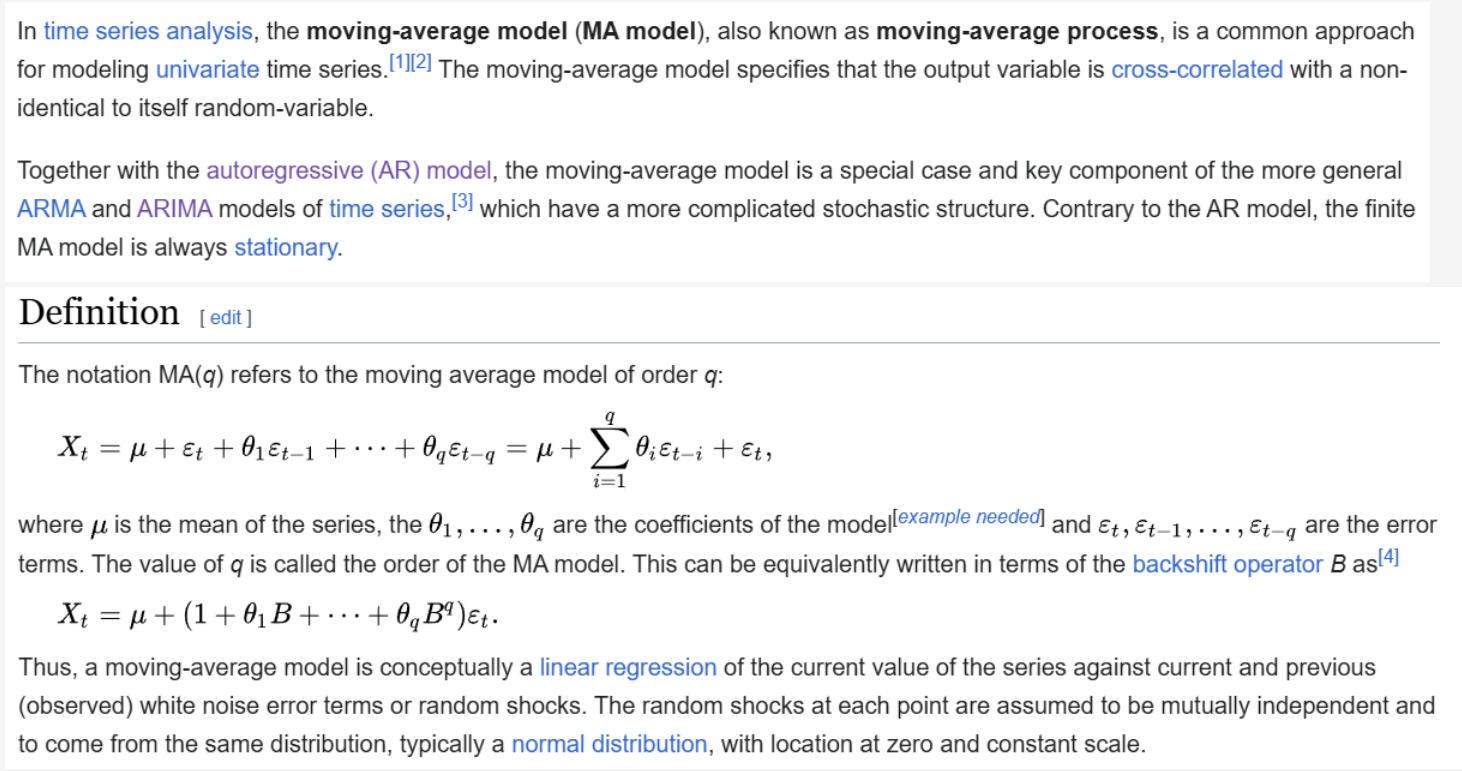

In [20]:
### Fitted SARIMA parameters:
#####################################################
{'intercept': -5.398901140173307e-08,
 'ma.L1': -0.1042188993634203,
 'ma.L2': -0.029764115450367442,
 'ma.L3': -0.002917953581047072,
 'ma.L4': 0.004290940137585559,
 'ma.L5': -0.012028812812397361,
 'sigma2': 2.956406656496939e-09,
 'order': (0, 1, 5),
 'seasonal_order': (0, 0, 0, 1),
 'aic': -5639035.469712176,
 'aicc': -5639035.469378472,
 'bic': -5638960.403255404,
 'hqic': -5639013.861095114}

{'intercept': -5.398901140173307e-08,
 'ma.L1': -0.1042188993634203,
 'ma.L2': -0.029764115450367442,
 'ma.L3': -0.002917953581047072,
 'ma.L4': 0.004290940137585559,
 'ma.L5': -0.012028812812397361,
 'sigma2': 2.956406656496939e-09,
 'order': (0, 1, 5),
 'seasonal_order': (0, 0, 0, 1),
 'aic': -5639035.469712176,
 'aicc': -5639035.469378472,
 'bic': -5638960.403255404,
 'hqic': -5639013.861095114}

In [21]:
import numpy as np
import pandas as pd

#-----------------DATA-----------------#
#1min EURGBP data
url = "https://onedrive.live.com/download?resid=4E16D53638D067A9%21339325&authkey=!AHOCBUokDjDiCc8"

data_downloaded = pd.read_csv(url, parse_dates = True, index_col=0) #it's a time series data, so I'm setting the index to be the first column
close = data_downloaded["close"].to_numpy() #We transform the close prices into a numpy array

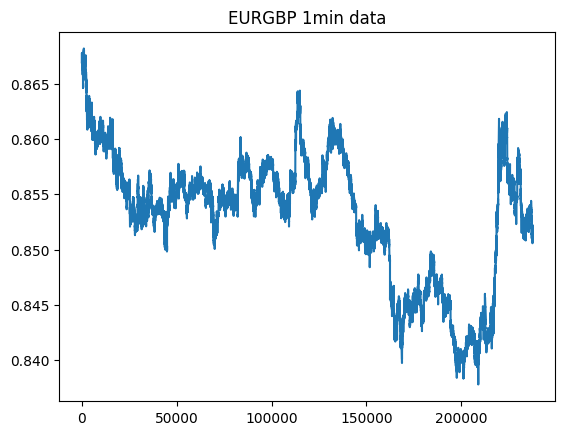

In [28]:
import matplotlib.pyplot as plt
plt.plot(close)
plt.title("EURGBP 1min data")
plt.show()

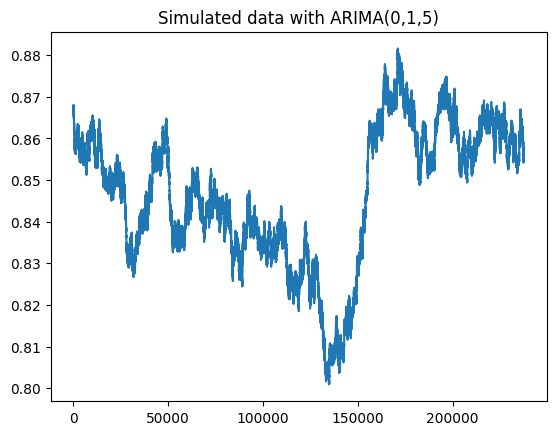

In [29]:
import numpy as np
import pandas as pd
from numba import njit

@njit(fastmath = True) #we use the njit decorator to speed up the function
def GenerateSimulation(data, plot= False):
    yt = np.zeros(len(data))
    yt[0] = data[0]
    error_terms = np.zeros(len(data))
    sigma2 = 2.956406656496939e-08
    sigma = np.sqrt(sigma2)
    error_terms[0] = np.random.normal(0, sigma)
    intercept = -5.398901140173307e-08
    
    for i in range(1,len(yt)):
        error_terms[i] = np.random.normal(0, sigma)
        yt[i] = yt[i-1] + intercept  + error_terms[i] + -0.1042188993634203 * error_terms[i-1] + -0.029764115450367442 * error_terms[i-2] + -0.002917953581047072 * error_terms[i-3] + 0.004290940137585559 * error_terms[i-4] + -0.012028812812397361 * error_terms[i-5]

    return yt

simulated_data = GenerateSimulation(close)
import matplotlib.pyplot as plt
plt.plot(simulated_data)
plt.title("Simulated data with ARIMA(0,1,5)")
plt.show()

In [23]:
### Now I need to simulate thousands of time series based on that model; I will use the same error terms for all of them
@njit(fastmath = True) #we use the njit decorator to speed up the function
def ThousandSimulations(data, number_simulations):
    simulated_series_matrix = np.zeros((len(data), number_simulations))
    for i in range(number_simulations):
        simulated_series_matrix[:,i] = GenerateSimulation(data)

    return simulated_series_matrix

In [24]:
### IMPORT THE BB BACKTEST FUNCTION FROM GITHUB:
import requests
url_function = "https://raw.githubusercontent.com/edoardoCame/PythonMiniTutorials/main/trading%20strategies/MyOwnBacktester/RESAMPLING%20optimization%20BBs/main_func.py"
response = requests.get(url_function)
exec(response.text)

In [25]:
from time import time
from numba import prange
@njit(fastmath = True, parallel=True) #we use the njit decorator to speed up the function
def MonteCarloOptimizer(data, num_simulations, window, num_std_devs, slippage=0.00002, starting_cash = 100000):
    simulated_series = ThousandSimulations(data, num_simulations)
    montecarlo_equities = np.zeros((len(data), num_simulations))
    
    splitter = num_simulations/2 #we split the simulations in two to run them in parallel

    for i in prange(0, int(splitter)):
        montecarlo_equities[:,i] = backtest_bollinger_bands(simulated_series[:,i], window=window, num_std_devs=num_std_devs, slippage=0.00002, starting_cash=starting_cash)
        print(f"Simulation {i} completed")


    for i in prange(int(splitter), num_simulations):
        montecarlo_equities[:,i] = backtest_bollinger_bands(simulated_series[:,i], window=window, num_std_devs=num_std_devs, slippage=0.00002, starting_cash=starting_cash)
        print(f"Simulation {i} completed")

    return montecarlo_equities

Simulation 48830 completed
Simulation 3519 completed
Simulation 13685 completed
Simulation 38300 completed
Simulation 391 completed
Simulation 48440 completed
Simulation 45320 completed
Simulation 13294 completed
Simulation 12121 completed
Simulation 17204 completed
Simulation 46490 completed
Simulation 49610 completed
Simulation 34400 completed
Simulation 14076 completed
Simulation 8602 completed
Simulation 48050 completed
Simulation 47660 completed
Simulation 5083 completed
Simulation 27370 completed
Simulation 1955 completed
Simulation 24242 completed
Simulation 28934 completed
Simulation 25024 completed
Simulation 39470 completed
Simulation 3128 completed
Simulation 45710 completed
Simulation 7820 completed
Simulation 10557 completed
Simulation 35570 completed
Simulation 19550 completed
Simulation 43760 completed
Simulation 49220 completed
Simulation 3910 completed
Simulation 29325 completed
Simulation 44150 completed
Simulation 46880 completed
Simulation 28543 completed
Simulation

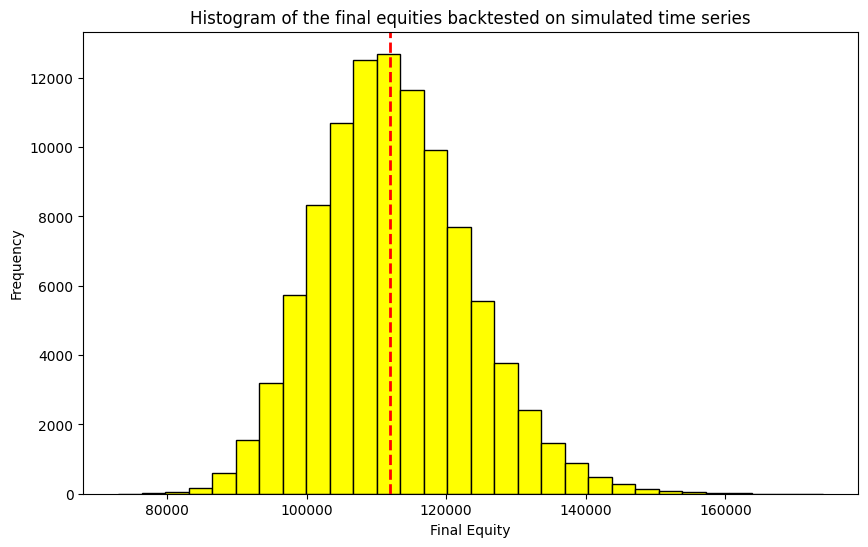

In [30]:
start = time()
montecarlo_equities = MonteCarloOptimizer(data=close, num_simulations=100000, window=60, num_std_devs=1, slippage=0.00002, starting_cash=100000)
print("Time taken with numba: ", time()-start)

last_rows = montecarlo_equities[-1,:]
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.hist(last_rows, bins=30, edgecolor='black', color='yellow')
plt.title('Histogram of the final equities backtested on simulated time series')
plt.xlabel('Final Equity')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
# Calculate the median
median_value = np.median(last_rows)
# Plot the median line
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')



plt.show()

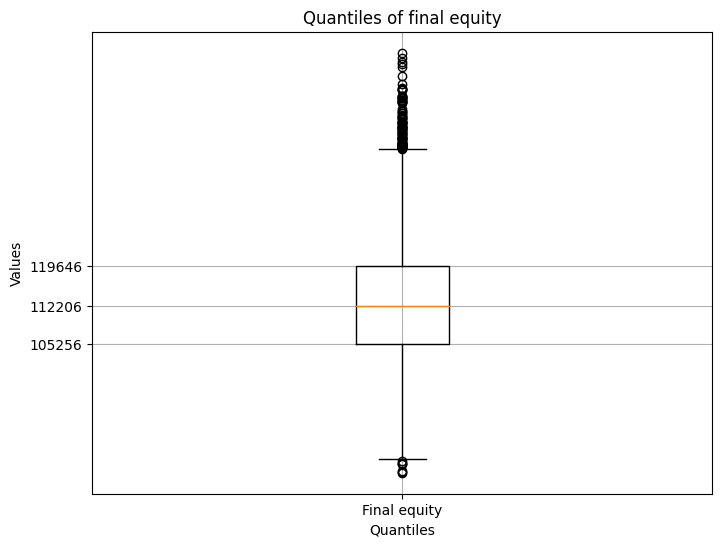

In [27]:
import numpy as np

import matplotlib.pyplot as plt

quantiles = np.quantile(last_rows, [0.25, 0.5, 0.75])

plt.figure(figsize=(8, 6))
plt.boxplot(last_rows)
plt.title('Quantiles of final equity')
plt.xlabel('Quantiles')
plt.ylabel('Values')
plt.xticks([1], ['Final equity'])
plt.yticks(quantiles)
plt.grid(True)
plt.show()